In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [ ]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df4 = pd.read_csv(r'/content/drive/MyDrive/PBL/Data Set Paper ID/dim__paper__company.csv')
df3 = pd.read_csv(r'/content/drive/MyDrive/PBL/Data Set Paper ID/dim__paper__promotion.csv')
df2 = pd.read_csv(r'/content/drive/MyDrive/PBL/Data Set Paper ID/fact__paper__digital_payment_request.csv')
df1 = pd.read_csv(r'/content/drive/MyDrive/PBL/Data Set Paper ID/fact__paper__digital_payment_transaction.csv')

# Part 2

## Deskripsi

In [ ]:
df1.head()

,dpt_id,dpt_promotion_id,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,NaN,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,20380.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,NaN,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,14673.6,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,NaN,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1012500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,NaN,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,30000.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,NaN,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,1000008.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498


In [ ]:
df2.head()

,dpt_id,total_fee_amount,document_type_name
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,380.0,PAY-OUT
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,273.6,PAY-OUT
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,19190.0,PAY-OUT
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,450.0,PAY-IN
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,1000.0,PAY-IN


In [ ]:
df3.head()

,dpt_promotion_id,promotion_code,promotion_name,transaction_promo_cashback_amount
0,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,0.0


In [ ]:
df4

,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,company_registered_datetime
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,0.0,1.0,0.0,0.0,FREE,2023-02-01 17:18:59
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-06-08 12:53:10
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-03-03 00:46:29
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2022-12-20 15:06:00
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ THREE MONTHS,2021-12-07 22:39:58
...,...,...,...,...,...,...,...,...,...,...,...
49995,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,FREE,2021-12-10 13:27:41
49996,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,2023-05-30 16:28:48
49997,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,VALIDASI_BERHASIL,BELUM_VALIDASI,PT,1.0,1.0,0.0,1.0,0.0,FREE,2023-01-15 21:38:22
49998,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,VALIDASI_BERHASIL,DOKUMEN_KURANG_LENGKAP,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ SIX MONTHS,2021-10-30 17:50:55


In [ ]:
df4.head()

,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,company_registered_datetime
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,0.0,1.0,0.0,0.0,FREE,2023-02-01 17:18:59
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-06-08 12:53:10
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-03-03 00:46:29
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2022-12-20 15:06:00
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ THREE MONTHS,2021-12-07 22:39:58


In [ ]:
print("Deskripsi df1:")
print(df1.describe())

print("\nDeskripsi df2:")
print(df2.describe())

print("\nDeskripsi df3:")
print(df3.describe())

print("\nDeskripsi df4:")
print(df4.describe())


Deskripsi df1:
       transaction_amount
count        5.000000e+04
mean         1.965125e+07
std          1.057004e+08
min          0.000000e+00
25%          7.000043e+04
50%          1.850172e+06
75%          1.398597e+07
max          2.014010e+10

Deskripsi df2:
       total_fee_amount
count      5.000000e+04
mean       2.516422e+05
std        7.423205e+05
min        0.000000e+00
25%        6.929090e+02
50%        1.084000e+04
75%        1.714465e+05
max        1.429265e+07

Deskripsi df3:
       transaction_promo_cashback_amount
count                       5.000000e+04
mean                        2.622213e+03
std                         3.802527e+04
min                         0.000000e+00
25%                         0.000000e+00
50%                         0.000000e+00
75%                         0.000000e+00
max                         2.500000e+06

Deskripsi df4:
       company_phone_verified_flag  company_email_verified_flag  \
count                 50000.000000                 

In [ ]:
df_info = {
    "df4": df4.info(),
    "df3": df3.info(),
    "df2": df2.info(),
    "df1": df1.info(),
}

df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   company_id                   50000 non-null  object 
 1   company_kyc_status_name      50000 non-null  object 
 2   company_kyb_status_name      50000 non-null  object 
 3   company_type_group           49999 non-null  object 
 4   company_phone_verified_flag  50000 non-null  float64
 5   company_email_verified_flag  50000 non-null  float64
 6   user_fraud_flag              50000 non-null  float64
 7   testing_account_flag         50000 non-null  float64
 8   blacklist_account_flag       50000 non-null  float64
 9   package_active_name          50000 non-null  object 
 10  company_registered_datetime  50000 non-null  object 
dtypes: float64(5), object(6)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data colu

{'df4': None, 'df3': None, 'df2': None, 'df1': None}

## Cleaning

In [ ]:
df1.isnull().sum()

,0
dpt_id,0
dpt_promotion_id,49063
buyer_id,0
seller_id,0
transaction_amount,0
payment_method_name,0
payment_provider_name,0
transaction_created_datetime,0
transaction_updated_datetime,0


In [ ]:
df2.isnull().sum()

,0
dpt_id,0
total_fee_amount,0
document_type_name,0


In [ ]:
df3.isnull().sum()

,0
dpt_promotion_id,49063
promotion_code,49355
promotion_name,49355
transaction_promo_cashback_amount,0


In [ ]:
df4.isnull().sum()

,0
company_id,0
company_kyc_status_name,0
company_kyb_status_name,0
company_type_group,1
company_phone_verified_flag,0
company_email_verified_flag,0
user_fraud_flag,0
testing_account_flag,0
blacklist_account_flag,0
package_active_name,0


In [ ]:
# Mengisi missing values dengan 'Unknown' dengan asumsi missing values merupakan transaksi tanpa promo
df1['dpt_promotion_id'] = df1['dpt_promotion_id'].fillna('Unknown')
df3[['dpt_promotion_id', 'promotion_code', 'promotion_name']] = df3[['dpt_promotion_id', 'promotion_code', 'promotion_name']].fillna('Unknown')

# Mengisi missing values dengan 'Unknown'
df4['company_type_group'] = df4['company_type_group'].fillna('Unknown')

In [ ]:
print(df1.isnull().count())
print(df2.isnull().count())
print(df3.isnull().count())
print(df4.isnull().count())

dpt_id                          50000
dpt_promotion_id                50000
buyer_id                        50000
seller_id                       50000
transaction_amount              50000
payment_method_name             50000
payment_provider_name           50000
transaction_created_datetime    50000
transaction_updated_datetime    50000
dtype: int64
dpt_id                50000
total_fee_amount      50000
document_type_name    50000
dtype: int64
dpt_promotion_id                     50000
promotion_code                       50000
promotion_name                       50000
transaction_promo_cashback_amount    50000
dtype: int64
company_id                     50000
company_kyc_status_name        50000
company_kyb_status_name        50000
company_type_group             50000
company_phone_verified_flag    50000
company_email_verified_flag    50000
user_fraud_flag                50000
testing_account_flag           50000
blacklist_account_flag         50000
package_active_name           

In [ ]:
# Outliers
Q1 = df1['transaction_amount'].quantile(0.25)
Q3 = df1['transaction_amount'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# jumlah outliers
outliers = df1[(df1['transaction_amount'] <= lower_bound) | (df1['transaction_amount'] >= upper_bound)]
print("jumlah outliers:", outliers.shape[0])

jumlah outliers: 6777


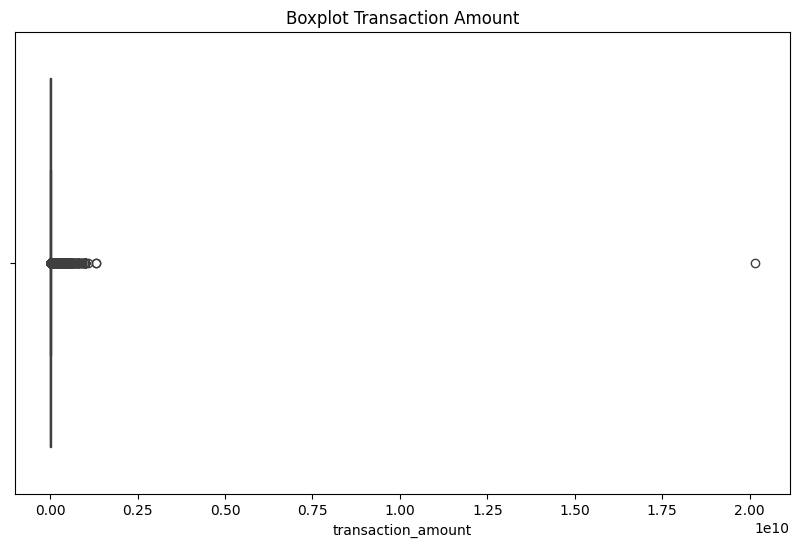

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['transaction_amount'])
plt.title('Boxplot Transaction Amount')
plt.show()

In [ ]:
# Memeriksa missing data di kolom fraud-related
missing_values = df4[['user_fraud_flag', 'blacklist_account_flag']].isnull().sum()
print("Missing values in key fraud-related columns:")
print(missing_values)

# Menentukan kondisi inkonsistensi
fraud_inconsistencies = df4[(df4['user_fraud_flag'] == 1) & (df4['blacklist_account_flag'] == 0)]
blacklist_inconsistencies = df4[(df4['user_fraud_flag'] == 0) & (df4['blacklist_account_flag'] == 1)]

# Menampilkan hasil inkonsistensi
print("\nFraud Inconsistencies:")
print(fraud_inconsistencies)
print("\nBlacklist Inconsistencies:")
print(blacklist_inconsistencies)
## Seharusnya jika user fraud flag = 1, blacklist account flag = 1
## Dan sebaliknya jika blacklist account flag = 1, user fraud flag = 1

# Menandai inkonsistensi fraud flag
df4['fraud_inconsistency_flag'] = (
    ((df4['user_fraud_flag'] == 1) & (df4['blacklist_account_flag'] == 0)) |
    ((df4['user_fraud_flag'] == 0) & (df4['blacklist_account_flag'] == 1))
).astype(int)

Missing values in key fraud-related columns:
user_fraud_flag           0
blacklist_account_flag    0
dtype: int64

Fraud Inconsistencies:
                                              company_id  \
0      bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...   
30     564d7304454d3552840f7483fd97b859319b4ba703e735...   
34     1cd7c6221d8919d6b0113eb17ab64ec31442189a6e635a...   
55     d76c958f4e0dd86f00a166da4c5d11d13f2a144a21f308...   
57     25254fe39611d129f85367f800017c529900ec1b271206...   
...                                                  ...   
49982  b1cf3c81b39ac9bc97ca57dc3a246414b31ea4d90a2a78...   
49985  81046b351fb34308b3d2352537f2b7bfb512ec1ca217e8...   
49986  ddf6a573d43d71101b433bd9680bcdf83a8d56f6f06df7...   
49989  483c184b5caa68aec0cee4d9de6f2f2c6d1cb73c05ea09...   
49996  f83e98fe775227a355ded830adb7c59914f2bcfd32965c...   

      company_kyc_status_name company_kyb_status_name company_type_group  \
0              AKUN_DIBEKUKAN          BELUM_VALIDASI         PER

## Feature Engineering

In [ ]:
# Buyer-Seller Relationship Score
# Menghitung jumlah interaksi antara buyer dan seller
df1['interaction_count'] = df1.groupby(['buyer_id', 'seller_id'])['seller_id'].transform('size')

# Membuat relationship score
df1['buyer_seller_relationship_score'] = (
    df1['interaction_count'] / df1['interaction_count'].max()
)

In [ ]:
# Transaction Frequency Metrics
df1['transaction_created_datetime'] = pd.to_datetime(df1['transaction_created_datetime'])
df1 = df1.sort_values(by=['buyer_id', 'transaction_created_datetime'])

# Jeda waktu antar transaksi untuk setiap buyer
df1['time_gap_seconds'] = df1.groupby('buyer_id')['transaction_created_datetime'].diff().dt.total_seconds()
df1['time_gap_seconds'] = df1['time_gap_seconds'].fillna(0)  # Fill NaN untuk transaksi pertama

# Ambang batas waktu (dalam detik)
long_gap_threshold = 90 * 24 * 3600  # 90 hari dalam detik
small_gap_threshold = 3600  # 1 jam dalam detik

# Menandai irregular time gaps dengan 1 (irregular) atau 0 (normal)
df1['irregular_time_gap_flag'] = df1['time_gap_seconds'].apply(
    lambda x: 0 if pd.isna(x) or x == 0 else
              (1 if x < small_gap_threshold or x > long_gap_threshold else 0)
)

In [ ]:
df1

,dpt_id,dpt_promotion_id,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime,interaction_count,buyer_seller_relationship_score,time_gap_seconds,irregular_time_gap_flag
22038,befdc59cf11ec39defab73c7baa0bd1c16ea7e003b59af...,Unknown,00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...,00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...,1.007000e+05,QRIS,QRIS,2023-12-27 08:47:56.463138,2023-12-27 08:48:03.576944,2,0.00158,0.000000e+00,0
20987,2bc105494f6030d5194fc6fdc50d9acede7d122dd80b3a...,Unknown,00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...,00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...,1.510500e+05,QRIS,QRIS,2023-12-28 11:30:42.785083,2023-12-28 11:30:49.305502,2,0.00158,9.616632e+04,0
30963,d8c359cc9de4f730939cfa6c5b50bac2215cf994a30816...,Unknown,001046b5061e28476b83fe2335b04d3210bed72a2fee17...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,2.000008e+08,BANK_TRANSFER,BCA_MANUAL,2023-08-13 11:50:37.122442,2023-08-13 13:04:54.522228,2,0.00158,0.000000e+00,0
9971,769c7fdcc0e36175c9363c6d822ebb5b9c8748acb8c12e...,Unknown,001046b5061e28476b83fe2335b04d3210bed72a2fee17...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,3.000000e+08,BANK_TRANSFER,BRI,2023-12-29 19:10:25.077279,2023-12-29 19:29:08.463497,2,0.00158,1.194959e+07,1
21264,d808c4f7daf19127c77a79dffadf947d9a5d4fa4a9ecb7...,Unknown,00119737eef11ff1d30c2061dd1e19c06d963d5a125c92...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,2.029000e+07,CREDIT_CARD,MASTERCARD,2023-05-05 10:12:38.083254,2023-05-31 09:19:27.323998,1,0.00079,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,3220d105503b34c8a43da87b7ac5365923742d74e699ae...,Unknown,fff5f7cf3deff1c2acad4533c4b845f8f2c0c05168f668...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1.015000e+07,CREDIT_CARD,MASTERCARD,2023-11-27 13:27:35.604107,2023-11-27 13:30:18.395752,1,0.00079,0.000000e+00,0
25856,0785c548ad9260f4c65b37836520e3781c9fd1cd441431...,Unknown,fff77b856ac2478f8911b9cddf65980ac7fdc4d700e354...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,2.826775e+06,CREDIT_CARD,VISA,2023-11-30 18:00:45.414410,2023-11-30 18:01:40.457680,1,0.00079,0.000000e+00,0
17692,7862efbfd8e68bd315332118e2c1dfb7e825ceb06819b0...,Unknown,fff9528eb5496b60fd3e824c66154f2d2f06c27c172a4a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,2.500000e+07,CREDIT_CARD,VISA,2023-06-15 09:26:40.813787,2023-06-15 09:30:16.690531,2,0.00158,0.000000e+00,0
24571,af0c97c859e45bcc17205bc081a7cfaa73c19a31369e22...,Unknown,fff9528eb5496b60fd3e824c66154f2d2f06c27c172a4a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,5.062312e+07,CREDIT_CARD,VISA,2023-07-15 15:02:32.964113,2023-07-15 15:04:35.161640,2,0.00158,2.612152e+06,0


In [ ]:
# Promotion Exploitation Indicator
# Menghitung penggunaan promo per pembeli dan promo id
df1['promo_usage_count'] = df1.groupby(['buyer_id', 'dpt_promotion_id'])['dpt_promotion_id'].transform('size')

# Menandai pengguna yang menggunakan promo yang sama berulang kali
threshold = 1
df1['promo_exploitation_flag'] = np.where((df1['promo_usage_count'] > threshold) & (df1['dpt_promotion_id'] != 'Unknown'), 1, 0)

In [ ]:
df1 = df1.sort_index()
df1

,dpt_id,dpt_promotion_id,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime,interaction_count,buyer_seller_relationship_score,time_gap_seconds,irregular_time_gap_flag,promo_usage_count,promo_exploitation_flag
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,Unknown,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,20380.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352,18,0.014218,5.617962e+02,1,18,0
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,Unknown,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,14673.6,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184,13,0.010269,2.601852e+04,0,13,0
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,Unknown,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1012500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359,7,0.005529,5.243862e+06,0,7,0
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,Unknown,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,30000.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121,11,0.008689,2.134060e+06,0,11,0
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,Unknown,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,1000008.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498,7,0.005529,2.009353e+06,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4da123d84a819edf166f67a9cc0c197f81967aa9717ed5...,Unknown,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,1000000.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-06-19 13:52:12.117180,2023-06-19 13:53:09.785285,6,0.004739,5.790313e+06,0,6,0
49996,0b358a09e15d062e1d9e0fafb8a986d802c2044b150a6e...,Unknown,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,50039500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA_CREDIT_CARD,2023-06-02 11:53:06.595470,2023-06-02 11:56:42.181481,9,0.007109,0.000000e+00,0,9,0
49997,ba67db08614a504cc5c9042cc61c914fa82748d526f0f3...,Unknown,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,4531500.0,QRIS,QRIS,2023-10-23 14:06:05.090016,2023-10-23 14:06:05.090016,124,0.097946,4.617009e+03,0,401,0
49998,351da251d731cba588418e4a175460cc822ecbeb751751...,Unknown,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,8424500.0,CREDIT_CARD,MASTERCARD,2023-11-05 16:24:20.163636,2023-11-05 16:25:34.101821,16,0.012638,7.680550e+05,0,15,0


## Scaling and Normalization

In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

# Robust Scaling untuk Transaction Amount
df1['transaction_amount'] = robust_scaler.fit_transform(
    df1[['transaction_amount']]
)

In [ ]:
df1['transaction_amount'].describe()

,transaction_amount
count,50000.000000
mean,1.279183
std,7.595615
min,-0.132953
25%,-0.127923
50%,0.000000
75%,0.872077
max,1447.132196


In [ ]:
df1.describe()

,transaction_amount,transaction_created_datetime,interaction_count,buyer_seller_relationship_score,time_gap_seconds,irregular_time_gap_flag,promo_usage_count,promo_exploitation_flag
count,50000.000000,50000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,1.279183,2023-08-01 01:47:15.453563648,68.352080,0.053991,1.029329e+06,0.182040,73.926560,0.002280
min,-0.132953,2022-02-09 13:00:04.571591,1.000000,0.000790,0.000000e+00,0.000000,1.000000,0.000000
25%,-0.127923,2023-05-17 15:43:26.120571648,4.000000,0.003160,3.886558e+02,0.000000,4.000000,0.000000
50%,0.000000,2023-08-02 07:39:19.236954368,12.000000,0.009479,8.873451e+04,0.000000,13.000000,0.000000
75%,0.872077,2023-10-26 12:49:39.276076032,41.000000,0.032385,8.276997e+05,0.000000,42.000000,0.000000
max,1447.132196,2023-12-30 23:41:33.008217,1266.000000,1.000000,4.311233e+07,1.000000,1266.000000,1.000000
std,7.595615,NaN,202.684052,0.160098,2.414826e+06,0.385881,208.738051,0.047695


# Part 4

## Cohort

In [ ]:
# Group by buyer_id to get the first transaction datetime
first_transactions = df1.groupby('buyer_id')['transaction_created_datetime'].min().reset_index()
first_transactions.rename(columns={'transaction_created_datetime': 'first_transaction_datetime'}, inplace=True)

# Extract the year and month of the first transaction for cohort analysis
first_transactions['cohort_month_year'] = first_transactions['first_transaction_datetime'].dt.to_period('M')

# Merge cohort information with the transactions dataset
transactions_with_first = pd.merge(df1, first_transactions[['buyer_id', 'cohort_month_year']], on='buyer_id')

# Group by cohort_month_year, buyer_id, and seller_id to calculate the total interaction count per cohort
cohort_interaction_summary = transactions_with_first.groupby(['cohort_month_year', 'buyer_id', 'seller_id'])['interaction_count'].sum().reset_index()

# Sort by cohort_month_year and interaction_count to see the most significant interactions within each cohort
cohort_interaction_summary = cohort_interaction_summary.sort_values(by=['cohort_month_year', 'interaction_count'], ascending=[True, False])

cohort_interaction_summary.head(10)

,cohort_month_year,buyer_id,seller_id,interaction_count
0,2022-02,d00378e3681d1e7dd96532493d0a5419caf5caeadc2614...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1
1,2022-04,4c11d4ba65f625bc0b1be81ad0d8a9d7c4f56b91f8d029...,4c11d4ba65f625bc0b1be81ad0d8a9d7c4f56b91f8d029...,4
2,2022-04,59c5b7d0e870ad2b48f63eccaac715f839eae2ed74c0c1...,59c5b7d0e870ad2b48f63eccaac715f839eae2ed74c0c1...,1
3,2022-06,985cba644c37cf3294c25ddbfbc15dd89b8cb153d4520c...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,4
4,2022-09,f2d6d9a79008436ae26162a6c5c52a7f95938028da98e2...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,361
5,2022-09,f2d6d9a79008436ae26162a6c5c52a7f95938028da98e2...,f2d6d9a79008436ae26162a6c5c52a7f95938028da98e2...,1
6,2022-09,f5464bc1fbee1864308e4c07ff6cc6075a6181fa1a3f6a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1
7,2022-10,69727a0401118d1b51fe319ece3377c39d0179d94890df...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,36
8,2022-10,ab7379325e505eaed2d93f90adc67bb4565007d9f7d5d9...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1
9,2022-10,db6a4757707d67d0b33919cdb2e38440cdf3076af9a866...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1


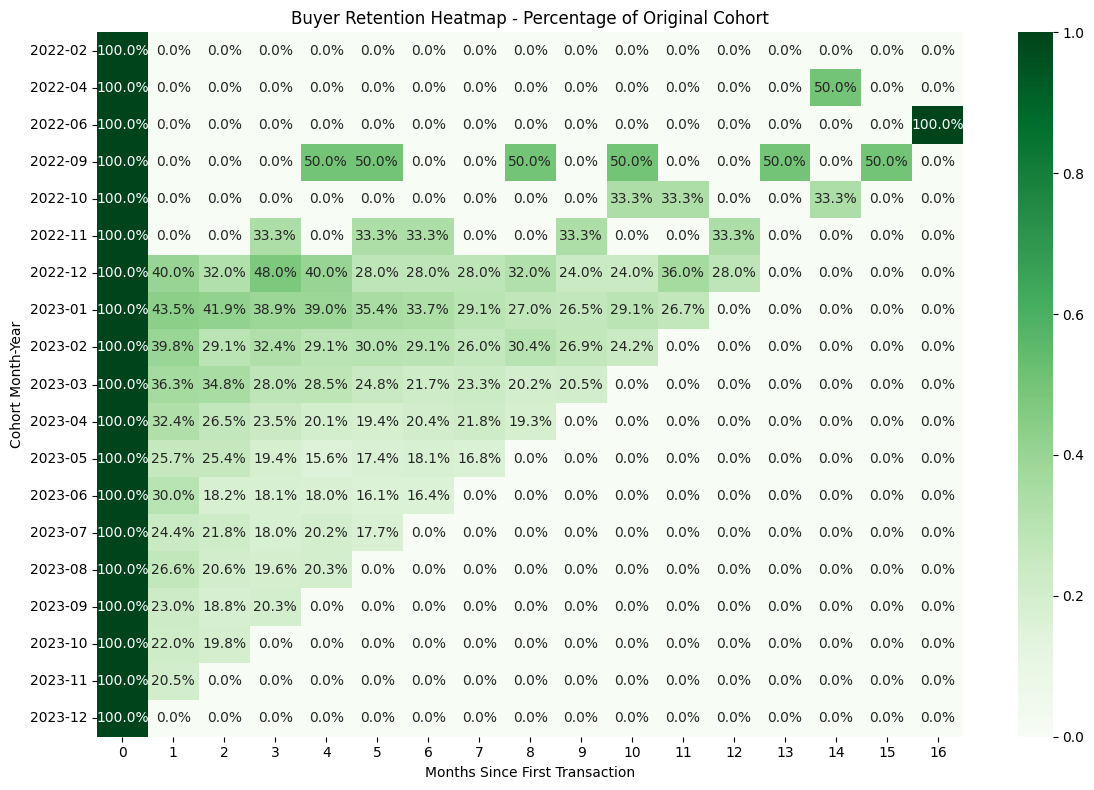

In [ ]:
# Calculate the month offset between the cohort start and each transaction
transactions_with_first['transaction_month'] = transactions_with_first['transaction_created_datetime'].dt.to_period('M')
transactions_with_first['month_offset'] = (transactions_with_first['transaction_month'] - transactions_with_first['cohort_month_year']).apply(lambda x: x.n)

# Create a pivot table to measure buyer retention (number of unique buyers per month offset)
retention_pivot = transactions_with_first.pivot_table(
    index='cohort_month_year',
    columns='month_offset',
    values='buyer_id',
    aggfunc='nunique',
    fill_value=0
)

# Convert to percentage of original cohort size
cohort_sizes = retention_pivot.iloc[:, 0]
retention_pivot_percentage = retention_pivot.divide(cohort_sizes, axis=0)

# Plot a heatmap to visualize buyer retention
plt.figure(figsize=(12, 8))
sns.heatmap(retention_pivot_percentage, cmap='Greens', annot=True, fmt='.1%')
plt.title('Buyer Retention Heatmap - Percentage of Original Cohort')
plt.xlabel('Months Since First Transaction')
plt.ylabel('Cohort Month-Year')
plt.tight_layout()
plt.show()

Terdapat Perilaku Tidak Wajar, Cohort yang menunjukkan lonjakan aktivitas tiba-tiba setelah beberapa bulan inaktif bisa jadi merupakan indikasi perilaku fraud atau abuse terhadap program promosi.

Selanjutnya mengidentifikasi apakah ada buyers terlibat dalam perilaku fraud

In [ ]:
# Identify whether certain buyers engage in fraudulent behavior
# concat because can't do merge
merge_promotion = pd.concat([df1.reset_index(drop=True), df3.reset_index(drop=True)], axis=1)

# Filter untuk transaksi yang terjadi setelah inaktivitas dan menggunakan promosi
promo_after_inactivity = merge_promotion[(df1['irregular_time_gap_flag'] == 1) & (df1['dpt_promotion_id'] != 'Unknown')]

# Group by buyer_id and dpt_promotion_id to identify suspicious behavior
suspicious_promo_usage = promo_after_inactivity[['buyer_id', 'seller_id', 'dpt_promotion_id', 'promo_usage_count', 'transaction_promo_cashback_amount']]

# Display suspicious behavior
suspicious_promo_usage

,buyer_id,seller_id,dpt_promotion_id,dpt_promotion_id,promo_usage_count,transaction_promo_cashback_amount
1957,471bde27f0a67733d7bed8b849e6fec9651d8f291b8a7b...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,promotion-339944981,d6d58a75dd5d629a6db1cb9f383f468502bfe507d1352a...,2,250000.00
3105,e3ae386dc4fb535e404e89e771de996a16fb15e10871e5...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,promotion-188676794,b92d45bb90f211e9c80eda0ae701c69242c9858724d7d5...,1,51000.00
3147,df5782fb33371a517b45715ca2014bcea06294f198a997...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,promotion-188676794,b92d45bb90f211e9c80eda0ae701c69242c9858724d7d5...,1,21000.00
3434,63f099dc4ff5ab8f29e0c34aa11a807c1005beaca46ed0...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,promotion-296267691,657348cf65794dac63887d289733c45a553049b7664074...,2,195000.00
3836,df5782fb33371a517b45715ca2014bcea06294f198a997...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,promotion-674366813,e34232ecd8d79cadbde56a282a79019ecaff1d0df76f6c...,1,30677.22
...,...,...,...,...,...,...
44869,5a5fee376300588eb0ded6550ca3ed3b289136eb9b7ba7...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,promotion-489484853,0c15ff0d7ba45d4d1b5f20c07877ee4e34c9cf7b57a349...,1,92800.00
48293,c19ae06628f8b817939b67c5c6e01ccdbd2b09fe32d16e...,342daf7d1b86a8f2aad4a3360d68dfcc404be6dde5d416...,promotion-249541501,04d9190bf0dfdcc9b411e91484cbc8d738389fe5945aa9...,1,8500.00
48599,c13140dcf054a0e6012d76ad7d6c7190ad29b88f451319...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,promotion-188676794,b92d45bb90f211e9c80eda0ae701c69242c9858724d7d5...,1,72000.00
48798,bd6feca266f00bb43afb7e306a91e2318abdfffb00163c...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,promotion-489458741,1aeb4f8e2bcd20d40daaf7579a53477e4547aee7741055...,1,8480.52


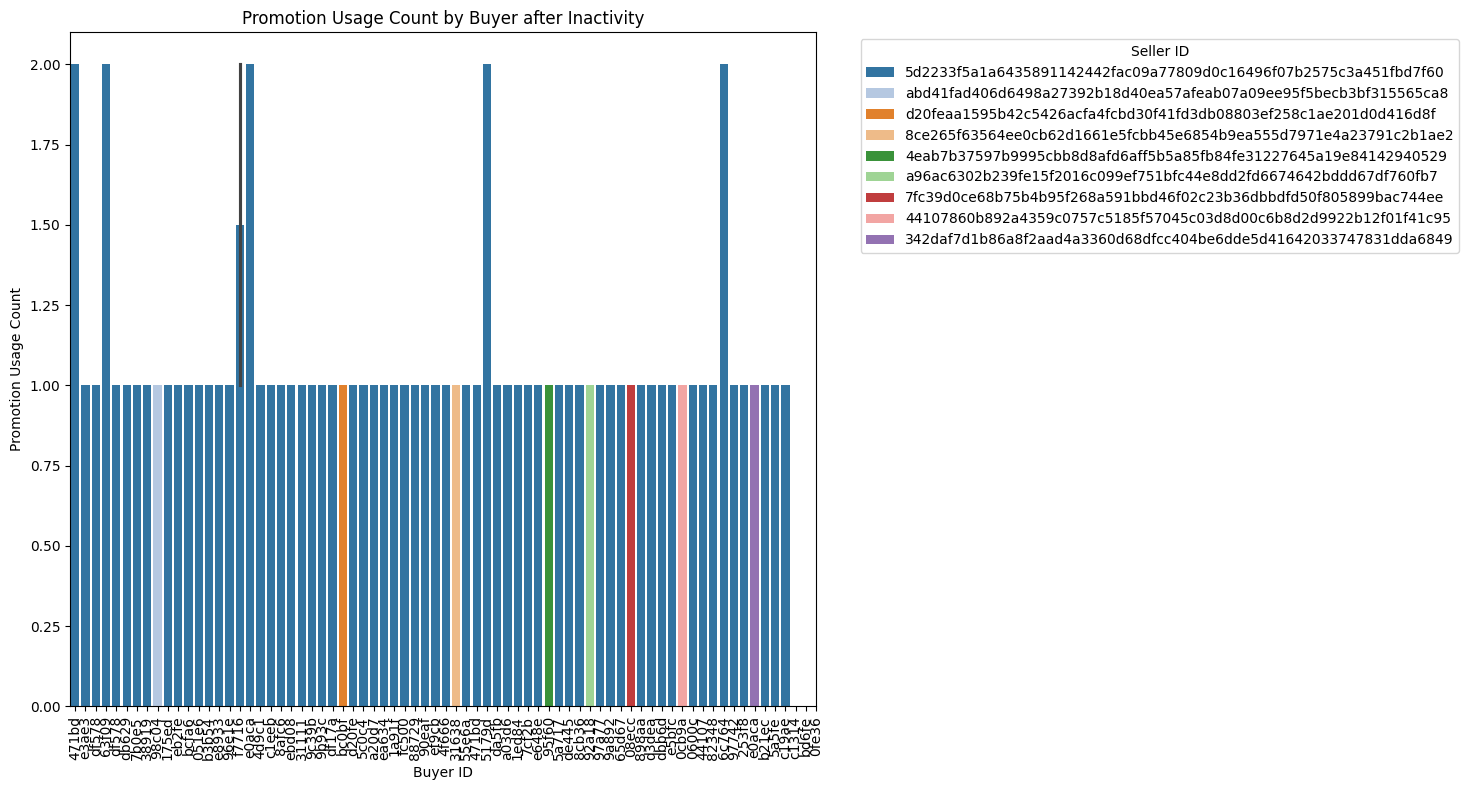

In [ ]:
# Bar plot untuk melihat penggunaan promosi per buyer setelah inaktivitas
plt.figure(figsize=(15, 8))
sns.barplot(data=suspicious_promo_usage, x='buyer_id', y='promo_usage_count', hue='seller_id', palette='tab20')

trimmed_buyer_ids = [buyer_id[:5] for buyer_id in suspicious_promo_usage['buyer_id']]

plt.title('Promotion Usage Count by Buyer after Inactivity')
plt.xlabel('Buyer ID')
plt.ylabel('Promotion Usage Count')
plt.xticks(range(len(trimmed_buyer_ids)), trimmed_buyer_ids, rotation=90)
plt.legend(title='Seller ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

***Dari bar chart analisis, dapat disimpulkan:***

**Zombie Account Menggunakan Promosi**: Terindikasi adanya akun zombie yang dihidupkan kembali setelah lama inaktif untuk memanfaatkan promosi berulang kali dan mendapatkan Cashback

**Kemungkinan 1 Orang Menggunakan Multi Account:** Banyak akun buyer menunjukkan pola serupa dalam penggunaan promosi setelah inaktivitas, mengindikasikan bahwa kemungkinan satu orang menggunakan banyak akun untuk memanfaatkan promosi secara maksimal.

**Kolusi dengan Seller yang Sama:** Terlihat bahwa buyer berulang kali bertransaksi dengan seller yang sama menggunakan promosi, yang mengindikasikan potensi kolusi antara buyer dan seller untuk memanfaatkan promosi dengan cara tidak wajar. Atau terindikasi mereka adalah  1 orang yang sama

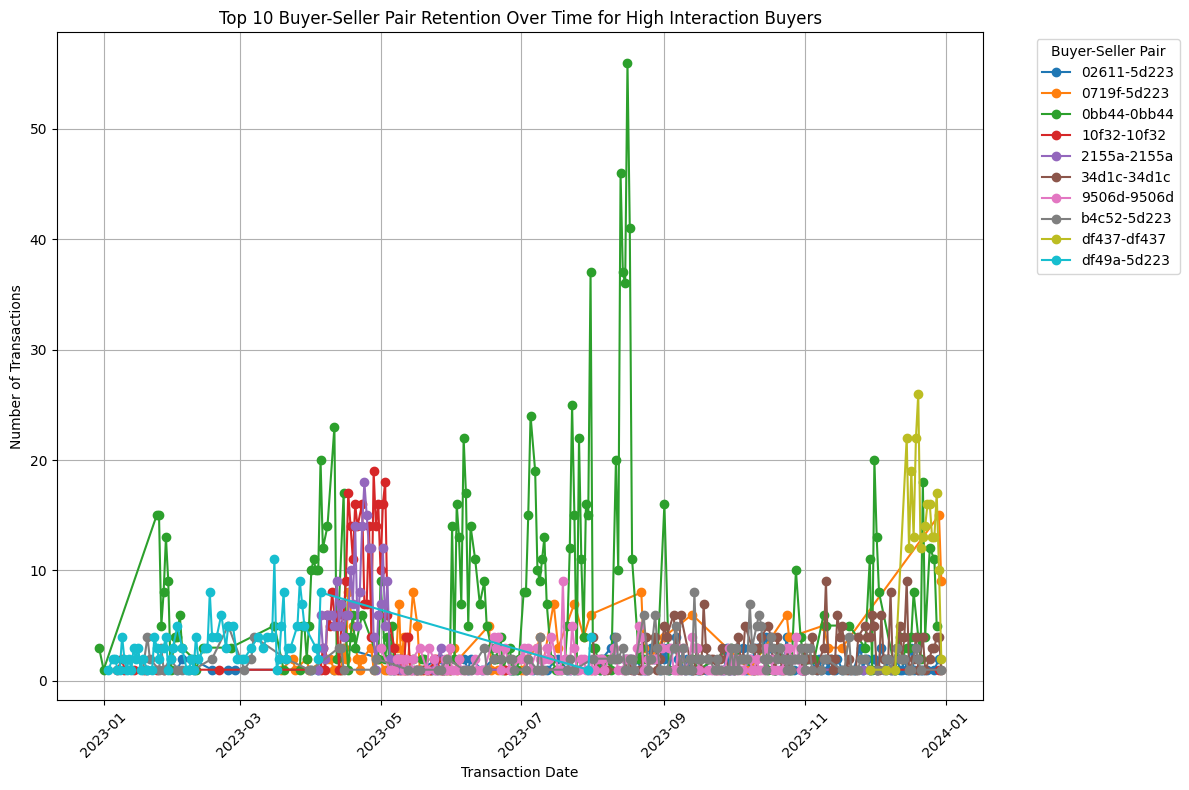

In [ ]:
# Filter data untuk pembeli dengan interaction_count tinggi
high_interaction = df1[df1['interaction_count'] > 30].copy()

# Ekstrak tanggal transaksi
high_interaction['transaction_date'] = high_interaction['transaction_created_datetime'].dt.date

# Urutkan berdasarkan interaction_count dan ambil top 10 pasangan buyer-seller
top_pairs = (
    high_interaction.groupby(['buyer_id', 'seller_id'])['interaction_count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter hanya untuk pasangan buyer-seller yang termasuk dalam top 10
top_high_interaction = high_interaction[
    high_interaction.set_index(['buyer_id', 'seller_id']).index.isin(top_pairs)
]

# Kelompokkan data berdasarkan pasangan buyer-seller dan tanggal
top_retention_data = (
    top_high_interaction.groupby(['buyer_id', 'seller_id', 'transaction_date'])
    .size()
    .reset_index(name='transaction_count')
)

# Visualisasikan retensi pasangan buyer-seller
plt.figure(figsize=(12, 8))

for pair in top_retention_data.groupby(['buyer_id', 'seller_id']).size().index:
    pair_data = top_retention_data[
        (top_retention_data['buyer_id'] == pair[0]) &
        (top_retention_data['seller_id'] == pair[1])
    ]
    label = f"{pair[0][:5]}-{pair[1][:5]}"
    plt.plot(pair_data['transaction_date'], pair_data['transaction_count'], marker='o', label=label)

plt.title('Top 10 Buyer-Seller Pair Retention Over Time for High Interaction Buyers')
plt.xlabel('Transaction Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Buyer-Seller Pair', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()